Name: Yesha Patel(000790164), Urvashiben Thakkar(000789927)

LTU Honor Code: "I pledge that on all academic work that I submit, I will neither give nor receive unauthorized aid, nor will I present another person's work as my own."

In [1]:
from google.colab import drive
drive.mount('/content/drive') #google drive mounted

Mounted at /content/drive


In [2]:
import os, shutil

IDs = ['A042', 'A069', 'A449', 'A980', 'B461', 'C708', 'F044', 'H298', 'J282',

       'K603', 'K629', 'N066', 'R903', 'S941', 'U927', 'V988', 'Y164']
# Directories for MC1

b_dir = '/content/drive/My Drive/FPD/FPD_MC2_C708'  #my directory path

train_dir = b_dir+'/train/'

vali_dir = b_dir+'/validation/'

test_dir = b_dir+'/test/'

test1_dir = b_dir+'/test1/'
def print_tot_num_images():

  for fn in IDs:

    trn = len(os.listdir (train_dir+fn))

    val = len(os.listdir (vali_dir+fn))

    tst = len(os.listdir (test_dir+fn))

    tst1 = len(os.listdir (test1_dir+fn))

    print(f"    ID: {fn} (train, vali, test, test1) = ({trn}, {val}, {tst}, {tst1})")

print_tot_num_images()

    ID: A042 (train, vali, test, test1) = (160, 20, 20, 0)
    ID: A069 (train, vali, test, test1) = (160, 20, 20, 0)
    ID: A449 (train, vali, test, test1) = (160, 20, 20, 0)
    ID: A980 (train, vali, test, test1) = (160, 20, 20, 0)
    ID: B461 (train, vali, test, test1) = (160, 20, 20, 0)
    ID: C708 (train, vali, test, test1) = (162, 18, 20, 20)
    ID: F044 (train, vali, test, test1) = (160, 20, 20, 0)
    ID: H298 (train, vali, test, test1) = (160, 20, 20, 0)
    ID: J282 (train, vali, test, test1) = (162, 20, 20, 0)
    ID: K603 (train, vali, test, test1) = (160, 20, 20, 0)
    ID: K629 (train, vali, test, test1) = (160, 20, 20, 0)
    ID: N066 (train, vali, test, test1) = (160, 20, 20, 0)
    ID: R903 (train, vali, test, test1) = (160, 20, 20, 0)
    ID: S941 (train, vali, test, test1) = (160, 20, 20, 0)
    ID: U927 (train, vali, test, test1) = (160, 20, 20, 0)
    ID: V988 (train, vali, test, test1) = (120, 20, 20, 0)
    ID: Y164 (train, vali, test, test1) = (160, 20, 20,

In [3]:
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(300, 500),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    vali_dir,
    image_size=(300, 500),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(300, 500),
    batch_size=32,
    shuffle=False)
test_dataset1 = image_dataset_from_directory(
    test1_dir,
    image_size=(300, 500),
    batch_size=32,
    shuffle=False)

Found 2722 files belonging to 17 classes.
Found 338 files belonging to 17 classes.
Found 340 files belonging to 17 classes.
Found 20 files belonging to 17 classes.


# **Model 1: CNN for Multi Class Classification 1**

In [4]:
#importing libraries
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.callbacks import ModelCheckpoint


#data augmentation for model
data_augmentation = keras.Sequential(
    [
        #layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomContrast(0.1),
        layers.RandomTranslation(0.1, 0.1)
    ]
)

In [5]:
inputs = keras.Input(shape=(300, 500, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(17, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

m=model
m.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 500, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 300, 500, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 250, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 250, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 125, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 125, 64)       18496 

In [6]:
#printing shape of data
for data_batch, labels_batch in train_dataset:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 300, 500, 3)
labels batch shape: (32,)


In [7]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=2,
        restore_best_weights=True,
        verbose=1),

   #model traing using fit and callbacks used for save best model while traning
    keras.callbacks.ModelCheckpoint(
        filepath="/drive/My Drive/h5/fingers_modelMC2a.h5",
        save_best_only=True,
        monitor="val_loss")
]

history = m.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    #callbacks=callbacks,
    callbacks=callbacks_list)
#!ls '/gdrive/My Drive/DL_data/history_files/'

Epoch 1/30
86/86 [==============================] - 1028s 12s/step - loss: 4.4564 - accuracy: 0.1323 - val_loss: 2.1708 - val_accuracy: 0.3550
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


86/86 [==============================] - 16s 176ms/step - loss: 1.8177 - accuracy: 0.4199 - val_loss: 1.6978 - val_accuracy: 0.4438
Epoch 3/30
86/86 [==============================] - 17s 178ms/step - loss: 1.2986 - accuracy: 0.5797 - val_loss: 1.6210 - val_accuracy: 0.4615
Epoch 4/30
86/86 [==============================] - 17s 177ms/step - loss: 0.9799 - accuracy: 0.6943 - val_loss: 1.0519 - val_accuracy: 0.6834
Epoch 5/30
86/86 [==============================] - 16s 176ms/step - loss: 0.7554 - accuracy: 0.7730 - val_loss: 0.6891 - val_accuracy: 0.8284
Epoch 6/30
86/86 [==============================] - 16s 175ms/step - loss: 0.5796 - accuracy: 0.8215 - val_loss: 0.9378 - val_accuracy: 0.7604
Epoch 7/30
86/86 [==============================] - 17s 177ms/step - loss: 0.5667 - accuracy: 0.8310 - val_loss: 0.9707 - val_accuracy: 0.7663
Epoch 7: early stopping


In [8]:
m.save('/drive/My Drive/h5/fingers_modelMC2a.h5') # best model save in folder

In [9]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [10]:
final_training_loss = history.history['loss'][-1]
final_validation_loss = history.history['val_loss'][-1]
final_training_accuracy = history.history['accuracy'][-1]
final_validation_accuracy = history.history['val_accuracy'][-1]

print("Final Training Loss:", final_training_loss)
print("Final Validation Loss:", final_validation_loss)
print("Final Training Accuracy:", 100*final_training_accuracy)
print("Final Validation Accuracy:", 100*final_validation_accuracy)


Final Training Loss: 0.566676139831543
Final Validation Loss: 0.9706541895866394
Final Training Accuracy: 83.10065865516663
Final Validation Accuracy: 76.62721872329712


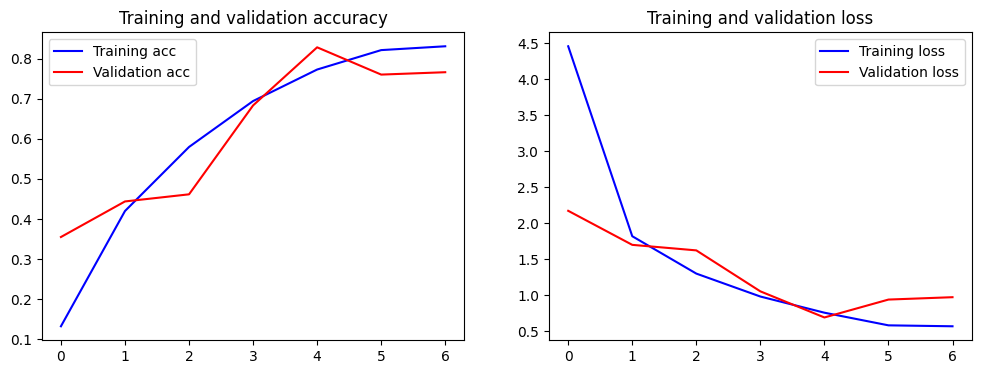

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'b', label='Training acc')
ax1.plot(epochs, val_acc, 'r', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'b', label='Training loss')
ax2.plot(epochs, val_loss, 'r', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

In [12]:
# To get the 1st batch from test dataset
for test_data_batch, test_labels_batch in test_dataset:
    print('test_data batch shape:', test_data_batch.shape)
    print('test_labels batch shape:', test_labels_batch.shape)
    break
#print(test_data_batch[0]) #float32

test_data batch shape: (32, 300, 500, 3)
test_labels batch shape: (32,)


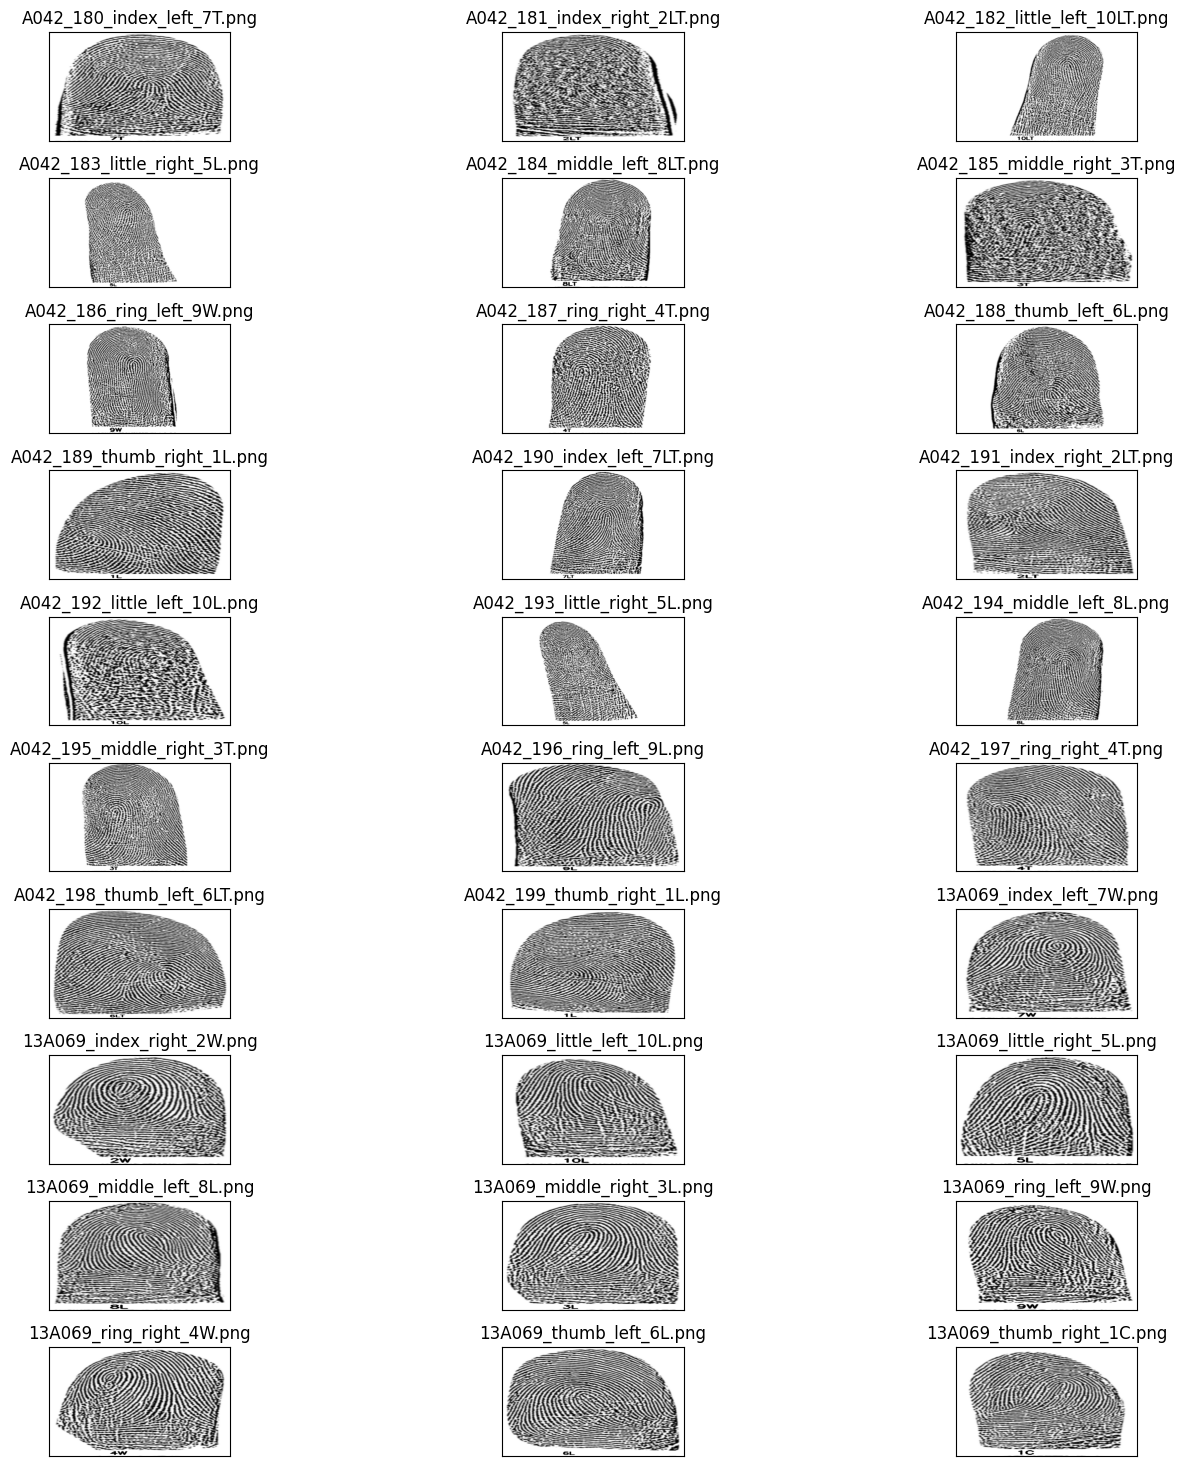

In [13]:
#displaying images from test dataset
plt.figure(figsize=(15,15))
for i in range(30):
    plt.subplot(10,3,i+1)
    plt.tight_layout()
    plt.imshow(test_data_batch[i].numpy().astype("uint8"))

    # Get the image filename
    image_name = test_dataset.file_paths[i].split('/')[-1]  # Assuming '/' as the path separator
    plt.title(image_name)  # Set the image name as the title

    plt.xticks([])
    plt.yticks([])

plt.show()


Evaluation 1

In [14]:
#model evaluation using test dataset
test_loss1, test_acc1 = m.evaluate(test_dataset1)
print(f"Test accuracy for CNN: {100*test_acc1:.3f}")

1/1 [==============================] - 4s 4s/step - loss: 0.6503 - accuracy: 0.8500
Test accuracy for CNN: 85.000


Evaluation 2

In [15]:
#model evaluation using test dataset
test_model = keras.models.load_model("/drive/My Drive/h5/fingers_modelMC2a.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy for CNN: {100*test_acc:.3f}")

11/11 [==============================] - 46s 5s/step - loss: 0.8140 - accuracy: 0.7559
Test accuracy for CNN: 75.588


# **Model 2: Pre-Trained for Multi Class Classification 1 - ResNet50**

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
#from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, f1_score



# Load ResNet50 convolutional base
resnet50_base = keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(300, 500, 3)
)

# Freeze all layers in the pre-trained model
resnet50_base.trainable = False

# Build model on top of convolutional base
inputs = keras.Input(shape=(300, 500, 3))
x = data_augmentation(inputs)
x = resnet50_base(inputs, training=False)
x = layers.GlobalMaxPooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(17, activation='softmax')(x)
model_resnet50 = keras.Model(inputs, outputs)


# Compile the model
model_resnet50.compile(optimizer='rmsprop',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Print model summary
model_resnet50.summary()

94765736/94765736 [==============================] - 3s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300, 500, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 10, 16, 2048)      23587712  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
 dense_1 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 17)                4369 

In [17]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=2,
        restore_best_weights=True,
        verbose=1),

   #model traing using fit and callbacks used for save best model while traning
    keras.callbacks.ModelCheckpoint(
        filepath="/content/drive/MyDrive/h5/MC2_FT.h5",
        save_best_only=True,
        monitor="val_loss")
]

# Train the ResNet50 model
history_resnet50 = model_resnet50.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    #callbacks=callbacks,
    callbacks=callbacks_list)
#!ls '/gdrive/My Drive/DL_data/history_files/'

Epoch 1/30
86/86 [==============================] - ETA: 0s - loss: 5.3666 - accuracy: 0.1716

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


86/86 [==============================] - 35s 328ms/step - loss: 5.3666 - accuracy: 0.1716 - val_loss: 2.3339 - val_accuracy: 0.2604
Epoch 2/30
86/86 [==============================] - 18s 187ms/step - loss: 2.3179 - accuracy: 0.2608 - val_loss: 2.4017 - val_accuracy: 0.2722
Epoch 3/30
86/86 [==============================] - 20s 215ms/step - loss: 2.1471 - accuracy: 0.3049 - val_loss: 1.8032 - val_accuracy: 0.4408
Epoch 4/30
86/86 [==============================] - 18s 188ms/step - loss: 1.9665 - accuracy: 0.3505 - val_loss: 1.9502 - val_accuracy: 0.3550
Epoch 5/30
86/86 [==============================] - 18s 191ms/step - loss: 1.8501 - accuracy: 0.3832 - val_loss: 1.9195 - val_accuracy: 0.3905
Epoch 5: early stopping


In [18]:
# Unfreeze some top layers of the pre-trained model for fine-tuning
resnet50_base.trainable = True
# Fine-tune from this layer onwards
for layer in resnet50_base.layers[:-4]:
    layer.trainable = False

# Recompile the model for fine-tuning
model_resnet50.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])


In [19]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=2,
        restore_best_weights=True,
        verbose=1),

   #model traing using fit and callbacks used for save best model while traning
    keras.callbacks.ModelCheckpoint(
        filepath="/content/drive/MyDrive/h5/MC2_FT.h5",
        save_best_only=True,
        monitor="val_loss")
]

# Train the ResNet50 model
history_resnet50 = model_resnet50.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    #callbacks=callbacks,
    callbacks=callbacks_list)
#!ls '/gdrive/My Drive/DL_data/history_files/'

Epoch 1/30
86/86 [==============================] - 24s 222ms/step - loss: 1.9016 - accuracy: 0.3567 - val_loss: 1.6704 - val_accuracy: 0.4704
Epoch 2/30
86/86 [==============================] - 20s 218ms/step - loss: 1.7848 - accuracy: 0.4026 - val_loss: 1.5736 - val_accuracy: 0.5266
Epoch 3/30
86/86 [==============================] - 20s 217ms/step - loss: 1.7441 - accuracy: 0.4170 - val_loss: 1.5397 - val_accuracy: 0.5503
Epoch 4/30
86/86 [==============================] - 21s 219ms/step - loss: 1.7092 - accuracy: 0.4166 - val_loss: 1.5196 - val_accuracy: 0.5503
Epoch 5/30
86/86 [==============================] - 20s 209ms/step - loss: 1.6988 - accuracy: 0.4357 - val_loss: 1.4939 - val_accuracy: 0.5799
Epoch 6/30
86/86 [==============================] - 20s 214ms/step - loss: 1.6586 - accuracy: 0.4353 - val_loss: 1.4887 - val_accuracy: 0.5621
Epoch 7/30
86/86 [==============================] - 20s 213ms/step - loss: 1.6436 - accuracy: 0.4423 - val_loss: 1.4634 - val_accuracy: 0.5740

In [20]:
model_resnet50.save('/content/drive/MyDrive/h5/MC2_FT.h5') # best model save in folder

In [21]:
final_training_loss = history.history['loss'][-1]
final_validation_loss = history.history['val_loss'][-1]
final_training_accuracy = history.history['accuracy'][-1]
final_validation_accuracy = history.history['val_accuracy'][-1]

print("Final Training Loss:", final_training_loss)
print("Final Validation Loss:", final_validation_loss)
print("Final Training Accuracy:", 100*final_training_accuracy)
print("Final Validation Accuracy:", 100*final_validation_accuracy)


Final Training Loss: 0.566676139831543
Final Validation Loss: 0.9706541895866394
Final Training Accuracy: 83.10065865516663
Final Validation Accuracy: 76.62721872329712


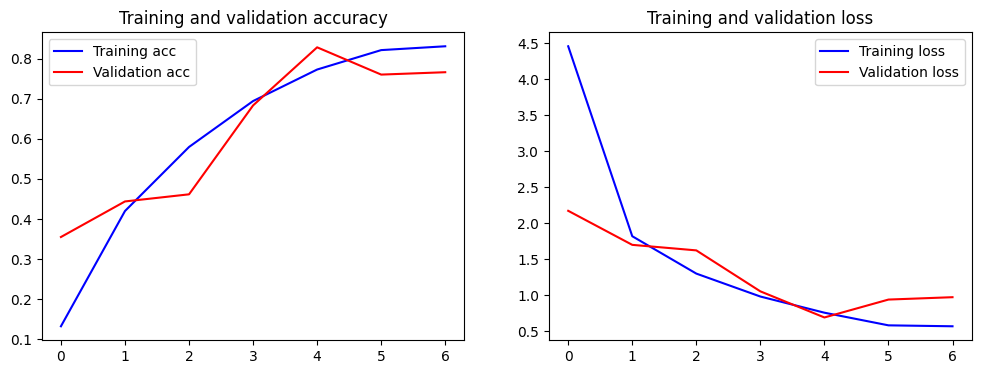

In [22]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax1.plot(epochs, acc, 'b', label='Training acc')
ax1.plot(epochs, val_acc, 'r', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'b', label='Training loss')
ax2.plot(epochs, val_loss, 'r', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()

test_data batch shape: (32, 300, 500, 3)
test_labels batch shape: (32,)


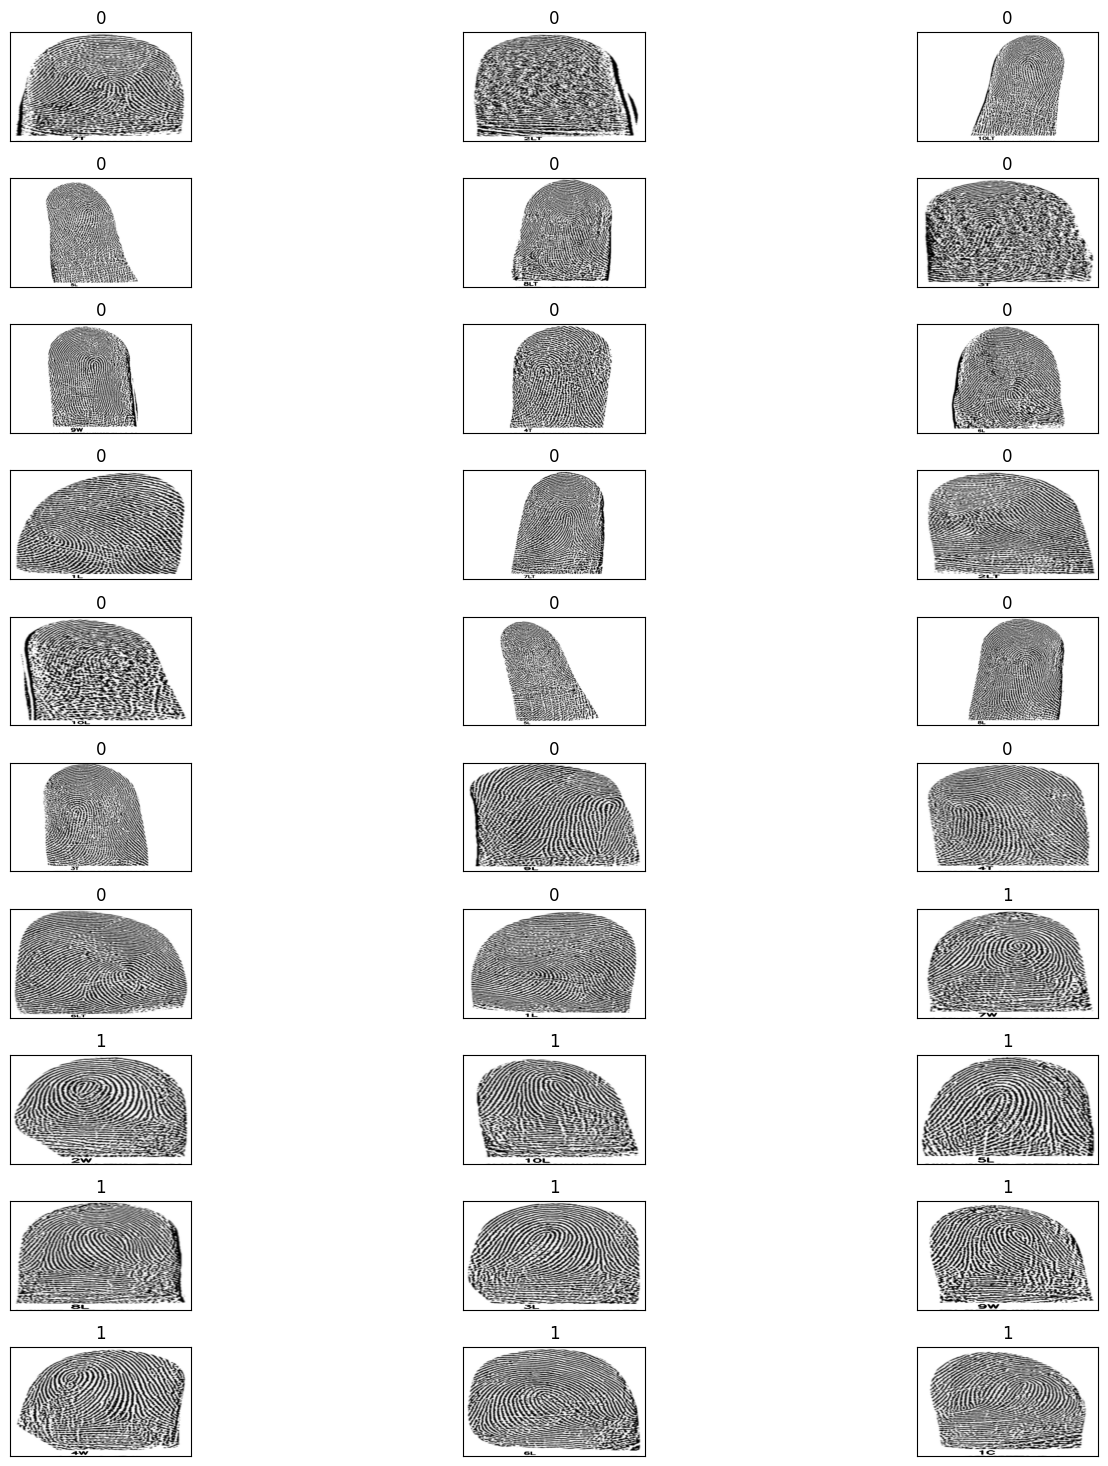

In [23]:
# To get the 1st batch from test dataset
for test_data_batch, test_labels_batch in test_dataset:
    print('test_data batch shape:', test_data_batch.shape)
    print('test_labels batch shape:', test_labels_batch.shape)
    break

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,15))
for i in range(30):
  plt.subplot(10,3,i+1)
  plt.tight_layout()
  plt.imshow(test_data_batch[i].numpy().astype("uint8"))
  plt.title(f"{test_labels_batch[i]}")
  plt.xticks([])
  plt.yticks([])

Evaluation 1

In [24]:
# Evaluate the model on the test dataset 1
loss, accuracy = model_resnet50.evaluate(test_dataset1)

print("Test Loss:", loss)
print("Test Accuracy:", 100*accuracy)

1/1 [==============================] - 1s 1s/step - loss: 1.2529 - accuracy: 0.8500
Test Loss: 1.252901315689087
Test Accuracy: 85.00000238418579


Evaluation 2

In [25]:
# Evaluate the model on the test dataset
loss, accuracy = model_resnet50.evaluate(test_dataset)

print("Test Loss:", loss)
print("Test Accuracy:", 100*accuracy)



11/11 [==============================] - 2s 152ms/step - loss: 1.1533 - accuracy: 0.6853
Test Loss: 1.1532881259918213
Test Accuracy: 68.52940917015076


11/11 [==============================] - 3s 163ms/step
Confusion Matrix:
[[14  0  1  0  0  0  3  0  1  0  0  0  0  0  0  0  1]
 [ 0 16  2  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 1  2  9  0  2  0  0  0  4  0  0  0  0  0  1  0  1]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  1  0  0  0  1  0  0  0  0  0  1]
 [ 0  0  0  0  0  0 11  1  3  1  2  0  2  0  0  0  0]
 [ 3  0  2  0  0  2  0  8  1  0  2  0  1  1  0  0  0]
 [ 0  1  0  0  0  0  2  1 13  0  0  0  1  2  0  0  0]
 [ 0  1  0  0  0  0  1  0  1 13  0  0  0  2  0  2  0]
 [ 0  1  1  0  0  0  4  2  0  0  9  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  1  1  0  2  0 10  0  0  0  1]
 [ 1  0  1  0  0  0  0  1  2  1  0  0  0 11  0  2  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0]
 [ 0  1  1  0  0  1  0  0  3  0  0  0  0  4  0 10  0]
 [ 0  3  0  0  0  0  0  0  0  0  2  0  0  1  0  0 14]]


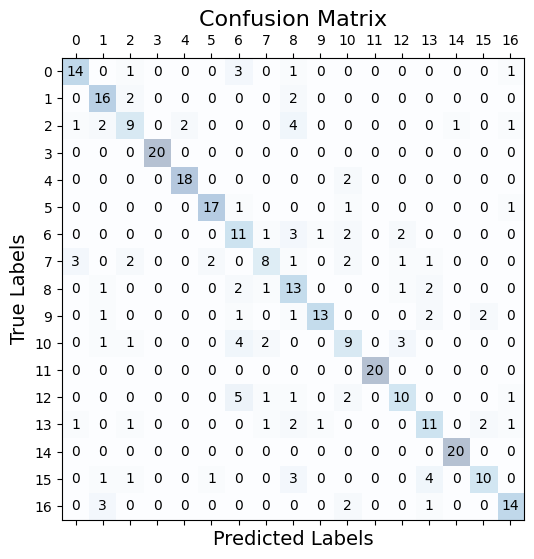

In [26]:
from matplotlib.ticker import MultipleLocator

# Predict labels for the test dataset
predictions = model_resnet50.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

# Extract true labels from the test dataset
true_labels = []
for images, labels in test_dataset:
    true_labels.extend(labels.numpy())

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='medium')
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [27]:
# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.6862235527180769


# **Avarage Esemble models**


In [28]:
# Load models
model1 = keras.models.load_model('/drive/My Drive/h5/fingers_modelMC2a.h5')
model2 = keras.models.load_model('/content/drive/MyDrive/h5/MC2_FT.h5')

test_loss1, test_acc1 = model1.evaluate(test_dataset)
test_loss2, test_acc2 = model2.evaluate(test_dataset)

ensemble_accuracy = (test_acc1 + test_acc2) / 2
print(f"Ensemble accuracy: {ensemble_accuracy:.2f}%")

# Make predictions
pred1 = model1.predict(test_dataset)
pred2 = model2.predict(test_dataset)

# Convert predictions to probabilities
prob1 = pred1.squeeze()  # Assuming pred1 has shape (batch_size, 1), squeeze to remove singleton dimension
prob2 = pred2.squeeze()  # Assuming pred2 has shape (batch_size, 1), squeeze to remove singleton dimension

# Now prob1 and prob2 contain class probabilities for the positive class
# finalpred=(pred1+pred2)/2
# print(finalpred)



# Calculate overall probability
overall_prob = np.mean([prob1, prob2], axis=0)

print(overall_prob)

11/11 [==============================] - 3s 153ms/step - loss: 1.1533 - accuracy: 0.6853
Ensemble accuracy: 0.72%
11/11 [==============================] - 3s 155ms/step
[[3.9031427e-02 9.9237934e-03 6.0129813e-03 ... 1.3481119e-02
  3.0174942e-03 1.2267930e-02]
 [1.2896602e-01 4.2251546e-02 1.2685539e-02 ... 4.1498295e-03
  5.3510513e-02 5.2571032e-02]
 [8.9112115e-01 7.0426479e-04 1.9713417e-03 ... 2.3151981e-04
  1.3311753e-02 5.6654401e-02]
 ...
 [2.7399015e-02 7.6663025e-02 1.9446600e-02 ... 4.2451923e-03
  2.6699474e-02 1.0494527e-02]
 [5.9465677e-02 1.5467017e-02 3.7398376e-02 ... 2.9968698e-02
  1.3090095e-03 6.1289781e-01]
 [2.2417374e-02 4.3291416e-02 1.9418722e-02 ... 5.3061411e-02
  2.4038041e-03 3.8604000e-01]]


1/1 [==============================] - 1s 991ms/step


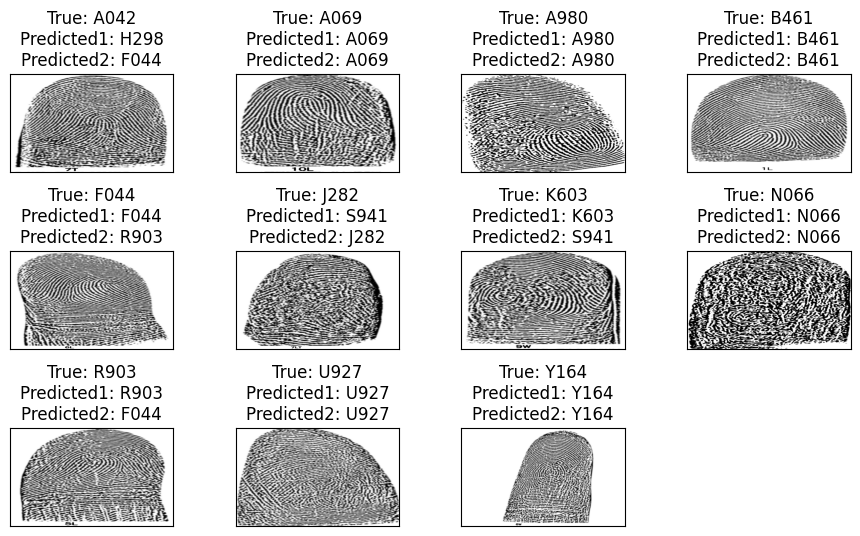

In [30]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import os

# Load models
model1 = keras.models.load_model('/drive/My Drive/h5/fingers_modelMC2a.h5')
model2 = keras.models.load_model('/content/drive/MyDrive/h5/MC2_FT.h5')

# Define class labels
class_labels = ['A042', 'A069', 'A449', 'A980', 'B461', 'C708', 'F044', 'H298', 'J282',
                'K603', 'K629', 'N066', 'R903', 'S941', 'U927', 'V988', 'Y164']

# Initialize the figure
plt.figure(figsize=(9, 9))

# Iterate through the test dataset and make predictions
for i, (test_data_batch, test_labels_batch) in enumerate(test_dataset):
    if i >= 20:  # Displaying only 30 images
        break

    plt.subplot(5, 4, i + 1)
    plt.tight_layout()
    plt.imshow(test_data_batch[0].numpy().astype("uint8"))  # Assuming batch size is 1

    # Make predictions using both models
    pred1 = model1.predict(test_data_batch)
    pred2 = model2.predict(test_data_batch)

    # Convert predictions to class labels
    label1 = class_labels[np.argmax(pred1[0])]
    label2 = class_labels[np.argmax(pred2[0])]

    # Get the true label
    true_label = class_labels[test_labels_batch[0]]

    # Display labels
    plt.title(f"True: {true_label}\nPredicted1: {label1}\nPredicted2: {label2}")

    plt.xticks([])
    plt.yticks([])

plt.show()
